In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:20.2f}'.format
import warnings
warnings.filterwarnings("ignore")
import joblib as jb
import numpy as np
pd.set_option('display.max_columns', 999)
from collections import Counter


## **PREPARE DATA**

In [2]:
df_churn = pd.read_csv(r"C:\Users\AD\Desktop\Data projects\python\Decision-making-system\Data\ecommerce_customer_data_custom_ratios.csv")

In [3]:
df_segment = pd.read_csv(r"C:\Users\AD\Desktop\Data projects\python\Decision-making-system\Data\Customer_Segmentation_Final.csv")

In [4]:
df_segment.columns.to_list()
df_segment_label  = df_segment[['customer_id','Customer_Labels']]

In [5]:
df_segment_label

,customer_id,Customer_Labels
0,KH46251,Lapsed Customers
1,KH13593,Regular Customers
2,KH28805,Regular Customers
3,KH28961,Regular Customers
4,KH12163,VIP Customers
...,...,...
39915,KH17165,Lapsed Customers
39916,KH45397,Lapsed Customers
39917,KH45410,Lapsed Customers
39918,KH48835,Lapsed Customers


In [6]:
df_churn['Customer ID'] = 'KH'+ df_churn['Customer ID'].astype(str)
df_churn.rename(columns={"Customer ID": "customer_id",},inplace = True)

In [7]:
df_input = pd.merge(df_churn,df_segment_label,on = 'customer_id')
df_input.to_csv("churn_input.csv",index = False)

## **DATA PREPROCESSING**

In [8]:
df_input = pd.read_csv(r"C:\Users\AD\Desktop\Data projects\python\Decision-making-system\Data\churn_input.csv")

In [9]:
df_input

,customer_id,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Customer_Labels
0,KH46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.00,Christine Hernandez,37,Male,0,Lapsed Customers
1,KH46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.00,Christine Hernandez,37,Male,0,Lapsed Customers
2,KH46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.00,Christine Hernandez,37,Male,0,Lapsed Customers
3,KH46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.00,Christine Hernandez,37,Male,0,Lapsed Customers
4,KH13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.00,James Grant,49,Female,1,Regular Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204158,KH17165,2020-02-25 13:38:16,Clothing,230,4,3664,Credit Card,18,0.00,Dawn Perez,18,Male,0,Lapsed Customers
204159,KH45397,2022-02-18 04:18:18,Books,95,2,3397,Cash,54,NaN,Scott Lindsey,54,Male,0,Lapsed Customers
204160,KH45410,2021-05-30 15:37:15,Home,311,2,3302,Credit Card,50,1.00,Johnny Riley,50,Male,0,Lapsed Customers
204161,KH48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1.00,Jeremy Rush,42,Female,1,Lapsed Customers


In [10]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204163 entries, 0 to 204162
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            204163 non-null  object 
 1   Purchase Date          204163 non-null  object 
 2   Product Category       204163 non-null  object 
 3   Product Price          204163 non-null  int64  
 4   Quantity               204163 non-null  int64  
 5   Total Purchase Amount  204163 non-null  int64  
 6   Payment Method         204163 non-null  object 
 7   Customer Age           204163 non-null  int64  
 8   Returns                165385 non-null  float64
 9   Customer Name          204163 non-null  object 
 10  Age                    204163 non-null  int64  
 11  Gender                 204163 non-null  object 
 12  Churn                  204163 non-null  int64  
 13  Customer_Labels        204163 non-null  object 
dtypes: float64(1), int64(6), object(7)
m

In [11]:
df_input.shape

(204163, 14)

In [12]:
df_input.isnull().sum()

customer_id                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  38778
Customer Name                0
Age                          0
Gender                       0
Churn                        0
Customer_Labels              0
dtype: int64

In [13]:
df_input.drop(columns={"Returns", "Age", "Total Purchase Amount"})

,customer_id,Purchase Date,Product Category,Product Price,Quantity,Payment Method,Customer Age,Customer Name,Gender,Churn,Customer_Labels
0,KH46251,2020-09-08 09:38:32,Electronics,12,3,Credit Card,37,Christine Hernandez,Male,0,Lapsed Customers
1,KH46251,2022-03-05 12:56:35,Home,468,4,PayPal,37,Christine Hernandez,Male,0,Lapsed Customers
2,KH46251,2022-05-23 18:18:01,Home,288,2,PayPal,37,Christine Hernandez,Male,0,Lapsed Customers
3,KH46251,2020-11-12 13:13:29,Clothing,196,1,PayPal,37,Christine Hernandez,Male,0,Lapsed Customers
4,KH13593,2020-11-27 17:55:11,Home,449,1,Credit Card,49,James Grant,Female,1,Regular Customers
...,...,...,...,...,...,...,...,...,...,...,...
204158,KH17165,2020-02-25 13:38:16,Clothing,230,4,Credit Card,18,Dawn Perez,Male,0,Lapsed Customers
204159,KH45397,2022-02-18 04:18:18,Books,95,2,Cash,54,Scott Lindsey,Male,0,Lapsed Customers
204160,KH45410,2021-05-30 15:37:15,Home,311,2,Credit Card,50,Johnny Riley,Male,0,Lapsed Customers
204161,KH48835,2021-11-23 01:30:42,Home,27,1,Credit Card,42,Jeremy Rush,Female,1,Lapsed Customers


## **Feature engineer**

In [14]:
def most_common(lst):
    counts = Counter(lst)
    if not counts:
        return None 
    return counts.most_common(1)[0][0]

In [15]:
df_input['TotalSpent'] = df_input['Quantity'] * df_input['Product Price']


In [16]:
df_features = df_input.groupby("customer_id", as_index=False, sort=False).agg(
    LastPurchaseDate = ("Purchase Date","max"),
    Favoured_Product_Categories = ("Product Category", lambda x: most_common(list(x))),
    Frequency = ("Purchase Date", "count"),
    TotalSpent = ("TotalSpent", "sum"),
    Favoured_Payment_Methods = ("Payment Method", lambda x: most_common(list(x))),
    Customer_Name = ("Customer Name", "first"),
    Customer_Label = ("Customer_Labels", "first"),
    Churn = ("Churn", "first"),
)
df_features = df_features.drop_duplicates(subset=['Customer_Name'], keep='first')


In [17]:
df_features['LastPurchaseDate'] = pd.to_datetime(df_features['LastPurchaseDate'])
df_features['LastPurchaseDate'] = df_features['LastPurchaseDate'].dt.date

In [18]:
df_features['LastPurchaseDate'] = pd.to_datetime(df_features['LastPurchaseDate'])

In [19]:
# add feature Recency (how long since the last purchase)
max_LastBuyingDate = df_features["LastPurchaseDate"].max()
df_features['Recency'] = (max_LastBuyingDate - df_features['LastPurchaseDate']).dt.days
df_features['LastPurchaseDate'] = df_features['LastPurchaseDate'].dt.date


In [20]:
df_features['Avg_Spend_Per_Purchase'] = df_features['TotalSpent'] / df_features['Frequency'].replace(0, 1)
df_features['Purchase_Consistency'] = df_features['Recency'] / df_features['Frequency'].replace(0, 1)


In [21]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39920 entries, 0 to 39919
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  39920 non-null  object 
 1   LastPurchaseDate             39920 non-null  object 
 2   Favoured_Product_Categories  39920 non-null  object 
 3   Frequency                    39920 non-null  int64  
 4   TotalSpent                   39920 non-null  int64  
 5   Favoured_Payment_Methods     39920 non-null  object 
 6   Customer_Name                39920 non-null  object 
 7   Customer_Label               39920 non-null  object 
 8   Churn                        39920 non-null  int64  
 9   Recency                      39920 non-null  int64  
 10  Avg_Spend_Per_Purchase       39920 non-null  float64
 11  Purchase_Consistency         39920 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 3.7+ MB


In [22]:
df_features.describe()

,Frequency,TotalSpent,Churn,Recency,Avg_Spend_Per_Purchase,Purchase_Consistency
count,39920.00,39920.00,39920.00,39920.00,39920.00,39920.00
mean,5.11,3906.76,0.20,256.96,763.96,83.69
std,2.21,2150.09,0.40,242.65,297.97,151.04
min,1.00,15.00,0.00,0.00,15.00,0.00
25%,4.00,2310.00,0.00,76.00,561.28,13.50
50%,5.00,3650.00,0.00,182.00,744.23,35.86
75%,7.00,5220.00,0.00,362.00,937.20,87.00
max,17.00,16860.00,1.00,1353.00,2495.00,1353.00


In [23]:
def detect_outliers(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    outliers_summary = {}
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count = outliers.shape[0]
        if outliers_count > 0:
            outliers_summary[col] = outliers_count
        else:
            outliers_summary[col] = 0
    
    if len(outliers_summary) > 0:
        outliers_info = "\n".join([f"{col}: {count} outliers" for col, count in outliers_summary.items()])
    else:
        outliers_info = "No outliers detected."
    return outliers_info

In [24]:
detect_outliers(df_features)

'Frequency: 242 outliers\nTotalSpent: 530 outliers\nChurn: 7999 outliers\nRecency: 1780 outliers\nAvg_Spend_Per_Purchase: 662 outliers\nPurchase_Consistency: 3869 outliers'

In [25]:
numeric_features = df_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_features.select_dtypes(include=['object']).columns.tolist()    

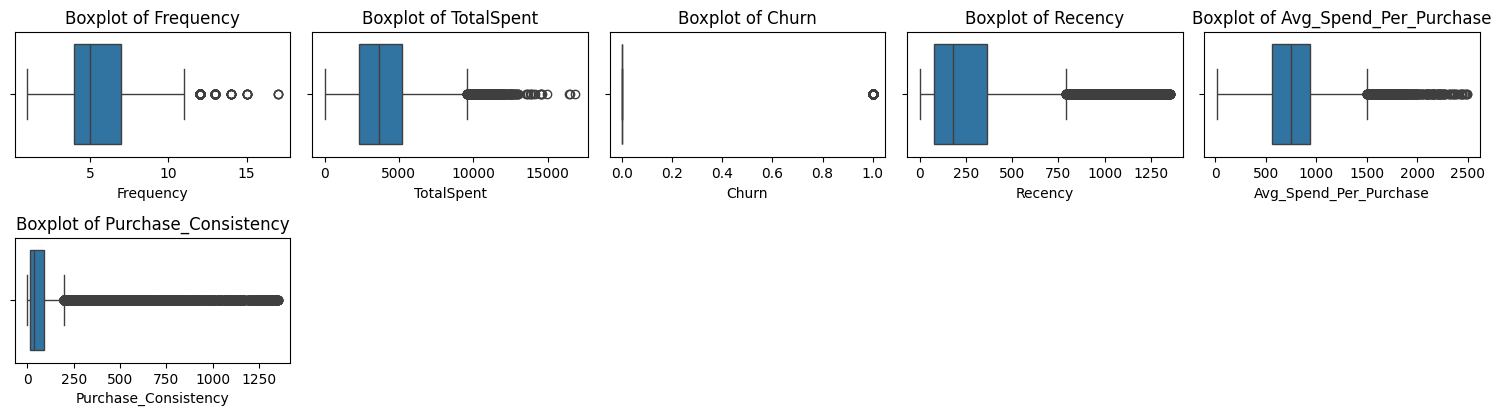

In [26]:

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df_features[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

## **EDA**

In [27]:
df_features['Customer_Label'].value_counts()

Customer_Label
Regular Customers    19416
VIP Customers        13202
Lapsed Customers      7302
Name: count, dtype: int64

In [28]:
df_features.columns.to_list()

['customer_id',
 'LastPurchaseDate',
 'Favoured_Product_Categories',
 'Frequency',
 'TotalSpent',
 'Favoured_Payment_Methods',
 'Customer_Name',
 'Customer_Label',
 'Churn',
 'Recency',
 'Avg_Spend_Per_Purchase',
 'Purchase_Consistency']

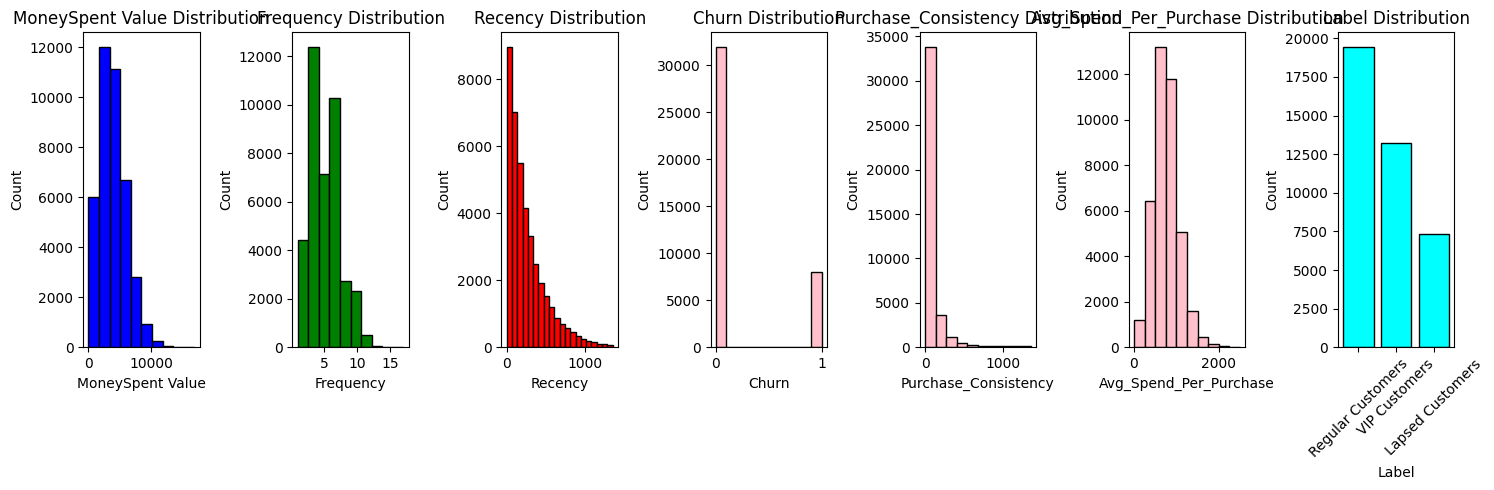

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 7, 1)
plt.hist(df_features['TotalSpent'], bins=10, color='blue', edgecolor='black')
plt.title('MoneySpent Value Distribution')
plt.xlabel('MoneySpent Value')
plt.ylabel('Count')

plt.subplot(1, 7, 2)
plt.hist(df_features['Frequency'], bins=10, color='green', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 7, 3)
plt.hist(df_features['Recency'], bins=20, color='red', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.subplot(1, 7, 4)
plt.hist(df_features["Churn"], color='pink', edgecolor='black')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.subplot(1, 7, 5)
plt.hist(df_features["Purchase_Consistency"], color='pink', edgecolor='black')
plt.title('Purchase_Consistency Distribution')
plt.xlabel('Purchase_Consistency')
plt.ylabel('Count')

plt.subplot(1, 7, 6)
plt.hist(df_features["Avg_Spend_Per_Purchase"], color='pink', edgecolor='black')
plt.title('Avg_Spend_Per_Purchase Distribution')
plt.xlabel('Avg_Spend_Per_Purchase')
plt.ylabel('Count')

plt.subplot(1, 7, 7)
label_counts = df_features["Customer_Label"].value_counts()
plt.bar(label_counts.index, label_counts.values, color='cyan', edgecolor='black')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [30]:
plot_df = df_features.copy()
plot_df.drop(columns=["customer_id","LastPurchaseDate",'Customer_Name'], inplace=True)
plot_df.columns.to_list()

['Favoured_Product_Categories',
 'Frequency',
 'TotalSpent',
 'Favoured_Payment_Methods',
 'Customer_Label',
 'Churn',
 'Recency',
 'Avg_Spend_Per_Purchase',
 'Purchase_Consistency']

In [31]:
plot_df['Customer_Label'].value_counts()

Customer_Label
Regular Customers    19416
VIP Customers        13202
Lapsed Customers      7302
Name: count, dtype: int64

In [32]:
cols_to_encode = ['Favoured_Product_Categories', 'Favoured_Payment_Methods','Customer_Label']
plot_df = pd.get_dummies(plot_df, columns=cols_to_encode)

In [33]:
plot_df

,Frequency,TotalSpent,Churn,Recency,Avg_Spend_Per_Purchase,Purchase_Consistency,Favoured_Product_Categories_Books,Favoured_Product_Categories_Clothing,Favoured_Product_Categories_Electronics,Favoured_Product_Categories_Home,Favoured_Payment_Methods_Cash,Favoured_Payment_Methods_Credit Card,Favoured_Payment_Methods_Crypto,Favoured_Payment_Methods_PayPal,Customer_Label_Lapsed Customers,Customer_Label_Regular Customers,Customer_Label_VIP Customers
0,4,2680,0,480,670.00,120.00,False,False,False,True,False,False,False,True,True,False,False
1,5,2560,1,153,512.00,30.60,False,False,False,True,False,True,False,False,False,True,False
2,6,2522,0,2,420.33,0.33,True,False,False,False,False,True,False,False,False,True,False
3,5,3217,0,89,643.40,17.80,True,False,False,False,False,True,False,False,False,True,False
4,9,6463,0,69,718.11,7.67,True,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39915,1,920,0,1298,920.00,1298.00,False,True,False,False,False,True,False,False,True,False,False
39916,1,190,0,574,190.00,574.00,True,False,False,False,True,False,False,False,True,False,False
39917,1,622,0,838,622.00,838.00,False,False,False,True,False,True,False,False,True,False,False
39918,1,27,1,661,27.00,661.00,False,False,False,True,False,True,False,False,True,False,False


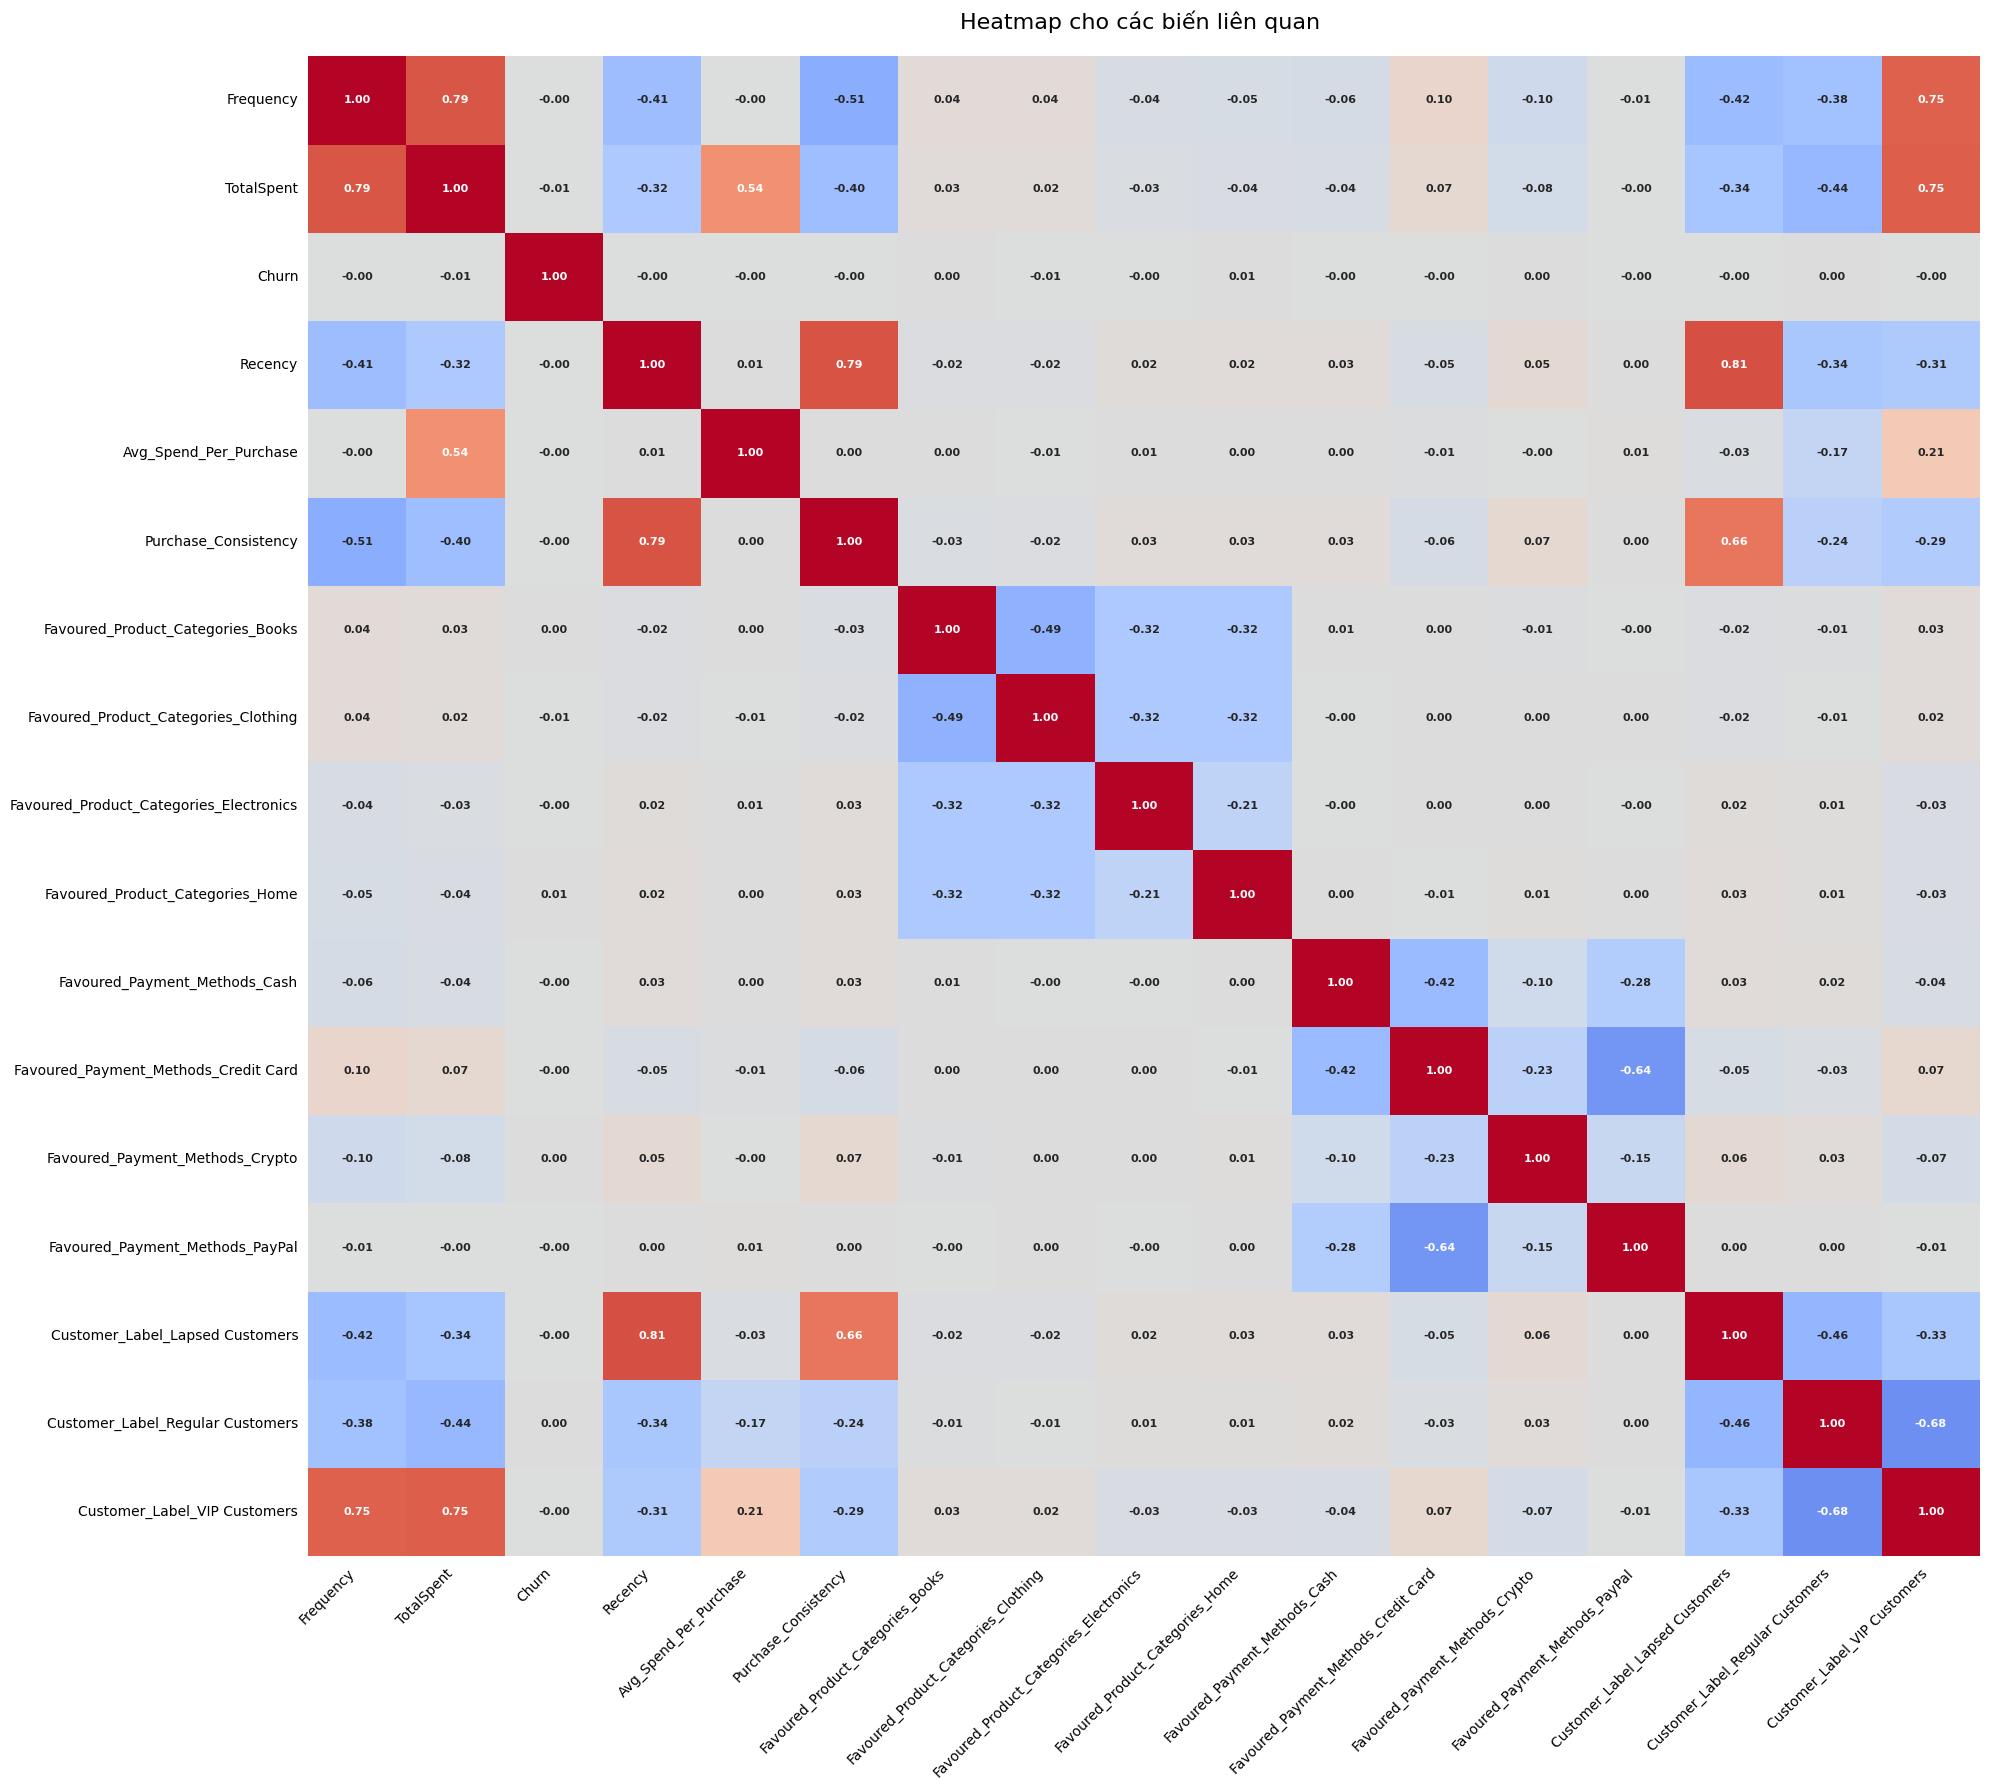

In [34]:
corr = plot_df.corr()

fig, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f',
            cmap='coolwarm', annot_kws={'fontsize': 8, 'fontweight': 'bold'}, cbar=False)

ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.title('Heatmap cho các biến liên quan ', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## **BUILD MODEL**

In [35]:
df_model = plot_df.copy()
df_model

,Frequency,TotalSpent,Churn,Recency,Avg_Spend_Per_Purchase,Purchase_Consistency,Favoured_Product_Categories_Books,Favoured_Product_Categories_Clothing,Favoured_Product_Categories_Electronics,Favoured_Product_Categories_Home,Favoured_Payment_Methods_Cash,Favoured_Payment_Methods_Credit Card,Favoured_Payment_Methods_Crypto,Favoured_Payment_Methods_PayPal,Customer_Label_Lapsed Customers,Customer_Label_Regular Customers,Customer_Label_VIP Customers
0,4,2680,0,480,670.00,120.00,False,False,False,True,False,False,False,True,True,False,False
1,5,2560,1,153,512.00,30.60,False,False,False,True,False,True,False,False,False,True,False
2,6,2522,0,2,420.33,0.33,True,False,False,False,False,True,False,False,False,True,False
3,5,3217,0,89,643.40,17.80,True,False,False,False,False,True,False,False,False,True,False
4,9,6463,0,69,718.11,7.67,True,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39915,1,920,0,1298,920.00,1298.00,False,True,False,False,False,True,False,False,True,False,False
39916,1,190,0,574,190.00,574.00,True,False,False,False,True,False,False,False,True,False,False
39917,1,622,0,838,622.00,838.00,False,False,False,True,False,True,False,False,True,False,False
39918,1,27,1,661,27.00,661.00,False,False,False,True,False,True,False,False,True,False,False


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from imblearn.over_sampling import SMOTE

In [37]:
X = df_model.drop(columns='Churn')
y = df_model["Churn"]

In [38]:
y.value_counts()

Churn
0    31921
1     7999
Name: count, dtype: int64

In [39]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y)
y_res.value_counts()

Churn
0    31921
1    31921
Name: count, dtype: int64

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
print(X_train.shape)
print(X_test.shape)

(51073, 16)
(12769, 16)


## **TEST FOR THE BEST MODEL**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score


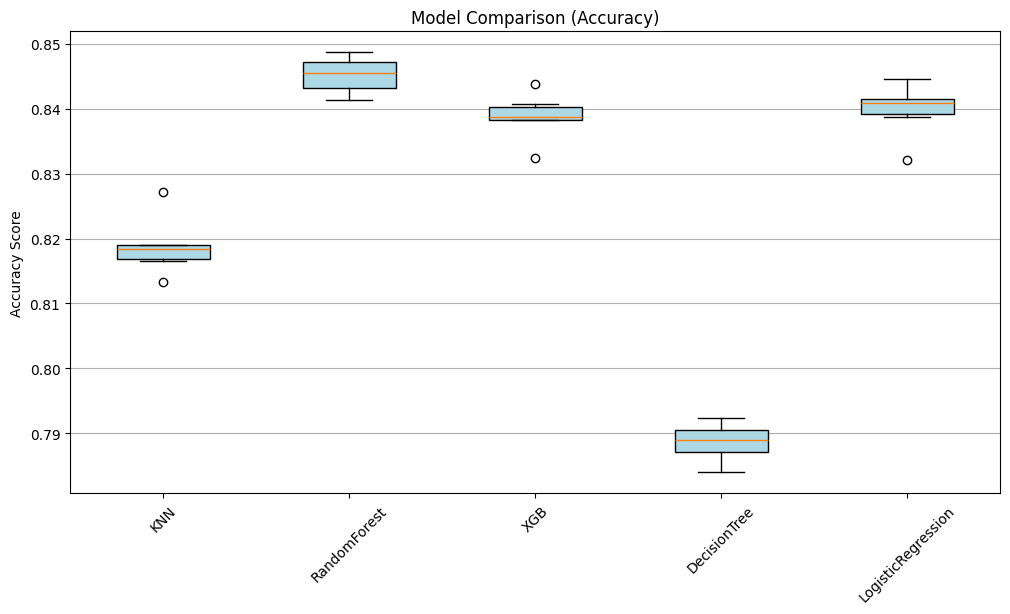

In [43]:

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGB": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000),
}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    results.append(cv_results)
plt.figure(figsize=(12, 6))
plt.boxplot(results, labels=models.keys(), patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Model Comparison (Accuracy)")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [44]:
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("{}  Accuracy: {}".format(name, test_score))

KNN  Accuracy: 0.8224606468791604
RandomForest  Accuracy: 0.8463466207220612
XGB  Accuracy: 0.8377320072049494
DecisionTree  Accuracy: 0.7911347795442086
LogisticRegression  Accuracy: 0.8373404338632626


==> USE RANDOMFOREST CLASSIFIER FOR BETTER ACCURACY

In [45]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
jb.dump(model,"churn_model.pkl")
jb.dump(scaler,"churn_scaler.pkl")

['churn_scaler.pkl']

In [47]:
churn_probabilities = model.predict_proba(X_test)[:, 1]
predictions = model.predict(X_test)

In [48]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, churn_probabilities))
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.8463466207220612
ROC-AUC Score: 0.8831548814983183

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      6332
           1       0.91      0.77      0.84      6437

    accuracy                           0.85     12769
   macro avg       0.85      0.85      0.85     12769
weighted avg       0.85      0.85      0.85     12769



## **Testing**

In [52]:
import pandas as pd
import numpy as np
import joblib as jb
from collections import Counter

In [53]:
model_churn = jb.load("churn_model.pkl")
scaler_churn  = jb.load("churn_scaler.pkl")

In [54]:
df_input = pd.read_csv(r"C:\Users\AD\Desktop\Data projects\python\Decision-making-system\Data\churn_input.csv")

In [55]:
df_input.columns.to_list()

['customer_id',
 'Purchase Date',
 'Product Category',
 'Product Price',
 'Quantity',
 'Total Purchase Amount',
 'Payment Method',
 'Customer Age',
 'Returns',
 'Customer Name',
 'Age',
 'Gender',
 'Churn',
 'Customer_Labels']

In [56]:
def most_common(lst):
    counts = Counter(lst)
    if not counts:
        return None 
    return counts.most_common(1)[0][0]

In [57]:
df_input.columns.to_list()

['customer_id',
 'Purchase Date',
 'Product Category',
 'Product Price',
 'Quantity',
 'Total Purchase Amount',
 'Payment Method',
 'Customer Age',
 'Returns',
 'Customer Name',
 'Age',
 'Gender',
 'Churn',
 'Customer_Labels']

In [58]:
def get_dummies(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        for col in categorical_cols:
            if df[col].isin(['yes', 'no', 'True', 'False']).any():
                df[col] = df[col].map({'yes': 1, 'True': 1, 'no': 0, 'False': 0})
            else:
                df = pd.get_dummies(df, columns=[col])
    return df

In [59]:
def process_data_for_churn(df_input):
    df_input.columns = df_input.columns.map(str.strip)
    cols_to_drop = {"Returns", "Age", "Total Purchase Amount", "Churn"}
    df_input.drop(columns=[col for col in cols_to_drop if col in df_input.columns], inplace=True)    
    df_input.dropna(inplace=True)
    if 'Price' not in df_input.columns:
        df_input['Price'] = df_input['Product Price']
    else:
        print("Price column already exists, skipping.") 
    df_input['TotalSpent'] = df_input['Quantity'] * df_input['Price']
    df_features = df_input.groupby("customer_id", as_index=False, sort=False).agg(
        LastPurchaseDate = ("Purchase Date","max"),
        Favoured_Product_Categories = ("Product Category", lambda x: most_common(list(x))),
        Frequency = ("Purchase Date", "count"),
        TotalSpent = ("TotalSpent", "sum"),
        Favoured_Payment_Methods = ("Payment Method", lambda x: most_common(list(x))),
        Customer_Name = ("Customer Name", "first"),
        Customer_Label = ("Customer_Labels", "first"),
    )
    df_features = df_features.drop_duplicates(subset=['Customer_Name'], keep='first')
    df_features['LastPurchaseDate'] = pd.to_datetime(df_features['LastPurchaseDate'])
    df_features['LastPurchaseDate'] = df_features['LastPurchaseDate'].dt.date
    df_features['LastPurchaseDate'] = pd.to_datetime(df_features['LastPurchaseDate'])
    max_LastBuyingDate = df_features["LastPurchaseDate"].max()
    df_features['Recency'] = (max_LastBuyingDate - df_features['LastPurchaseDate']).dt.days
    df_features['LastPurchaseDate'] = df_features['LastPurchaseDate'].dt.date
    df_features['Avg_Spend_Per_Purchase'] = df_features['TotalSpent']/df_features['Frequency'].replace(0,1)
    df_features['Purchase_Consistency'] = df_features['Recency'] / df_features['Frequency'].replace(0, 1)
    df_features.drop(columns=["LastPurchaseDate"],axis=1,inplace=True)
    return df_features

In [60]:
def encode_churn(df_features: pd.DataFrame):
    df_copy = df_features.copy()
    df_copy.drop(columns=["customer_id","Customer_Name"],axis=1,inplace=True)
    df_features_encode = get_dummies(df_copy)
    return df_features_encode

In [61]:
def churn_prediction(df_input:pd.DataFrame):
    df_features = process_data_for_churn(df_input)
    df_features_encode = encode_churn(df_features)
    X = scaler_churn.fit_transform(df_features_encode)
    y_pred = model_churn.predict_proba(X)[:, 1]
    df_features['Churn_Probability'] = y_pred
    return df_features

In [62]:
df_result = churn_prediction(df_input)

In [63]:
df_result


,customer_id,Favoured_Product_Categories,Frequency,TotalSpent,Favoured_Payment_Methods,Customer_Name,Customer_Label,Recency,Avg_Spend_Per_Purchase,Purchase_Consistency,Churn_Probability
0,KH46251,Home,4,2680,PayPal,Christine Hernandez,Lapsed Customers,480,670.000000,120.000000,0.99
1,KH13593,Home,5,2560,Credit Card,James Grant,Regular Customers,153,512.000000,30.600000,0.64
2,KH28805,Books,6,2522,Credit Card,Jose Collier,Regular Customers,2,420.333333,0.333333,0.13
3,KH28961,Books,5,3217,Credit Card,James Stein,Regular Customers,89,643.400000,17.800000,0.05
4,KH12163,Books,9,6463,Credit Card,Sonia Moreno,VIP Customers,69,718.111111,7.666667,0.26
...,...,...,...,...,...,...,...,...,...,...,...
39915,KH17165,Clothing,1,920,Credit Card,Dawn Perez,Lapsed Customers,1298,920.000000,1298.000000,0.20
39916,KH45397,Books,1,190,Cash,Scott Lindsey,Lapsed Customers,574,190.000000,574.000000,0.95
39917,KH45410,Home,1,622,Credit Card,Johnny Riley,Lapsed Customers,838,622.000000,838.000000,0.21
39918,KH48835,Home,1,27,Credit Card,Jeremy Rush,Lapsed Customers,661,27.000000,661.000000,0.77


In [51]:
df_result.columns.to_list()

['Favoured_Product_Categories',
 'Frequency',
 'TotalSpent',
 'Favoured_Payment_Methods',
 'Customer_Label',
 'Recency',
 'Avg_Spend_Per_Purchase',
 'Purchase_Consistency',
 'Churn_Probability']